<a href="https://colab.research.google.com/github/berberberk/timl-fs-2024/blob/main/TIML3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [2]:

# Данные
x = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781,
              6.4862, 5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794,
              6.3654, 5.1301, 6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261,
              5.5649, 18.945, 12.828, 10.957, 13.176, 22.203, 5.2524, 6.5894,
              9.2482, 5.8918, 8.2111, 7.9334, 8.0959, 5.6063, 12.836, 6.3534,
              5.4069, 6.8825, 11.708, 5.7737, 7.8247, 7.0931, 5.0702, 5.8014,
              11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031, 6.3328, 6.3589,
              6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279, 14.908,
              18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345,
              6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077,
              5.7292, 5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002,
              5.5204, 5.0594, 5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394,
              5.4369])

y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12,
              6.5987, 3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129,
              5.3048, 0.56077, 3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875,
              3.0825, 22.638, 13.501, 7.0467, 14.692, 24.147, -1.22, 5.9966,
              12.134, 1.8495, 6.5426, 4.5623, 4.1164, 3.3928, 10.117, 5.4974,
              0.55657, 3.9115, 5.3854, 2.4406, 6.7318, 1.0463, 5.1337, 1.844,
              8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981, 1.4233, -1.4211,
              2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929, 12.054,
              17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,
              1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576,
              0.47953, 0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981,
              0.92695, 0.152, 2.8214, 1.8451, 4.2959, 7.2029, 1.9869, 0.14454,
              9.0551, 0.61705])

# Преобразование в двумерный массив
X = x.reshape(-1, 1)
y = y


In [3]:
# Линейная регрессия
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred = linear_reg.predict(X)

# Коэффициенты
print(f"Коэффициент наклона (w): {linear_reg.coef_[0]:.4f}")
print(f"Свободный член (b): {linear_reg.intercept_:.4f}")


Коэффициент наклона (w): 1.1930
Свободный член (b): -3.8958


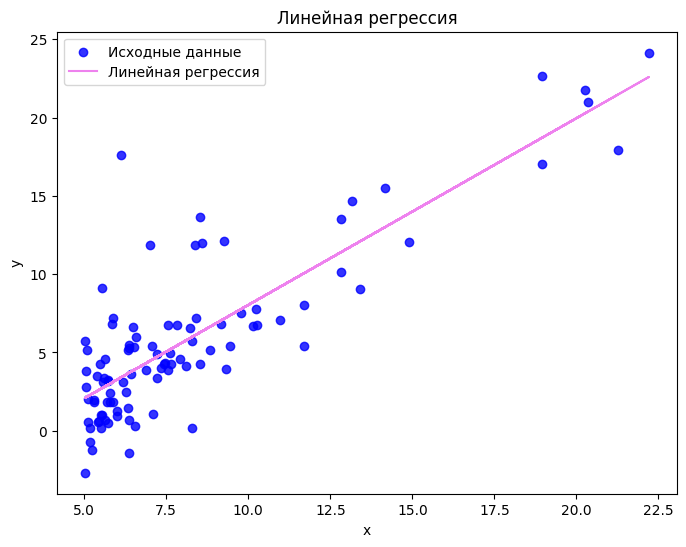

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Исходные данные", alpha=0.8)
plt.plot(x, y_pred, color="violet", label="Линейная регрессия")
plt.title("Линейная регрессия")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


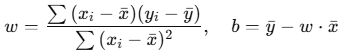

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)
w_analytical = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
b_analytical = y_mean - w_analytical * x_mean

print(f"Аналитическое решение: w = {w_analytical:.4f}, b = {b_analytical:.4f}")


Аналитическое решение: w = 1.1930, b = -3.8958


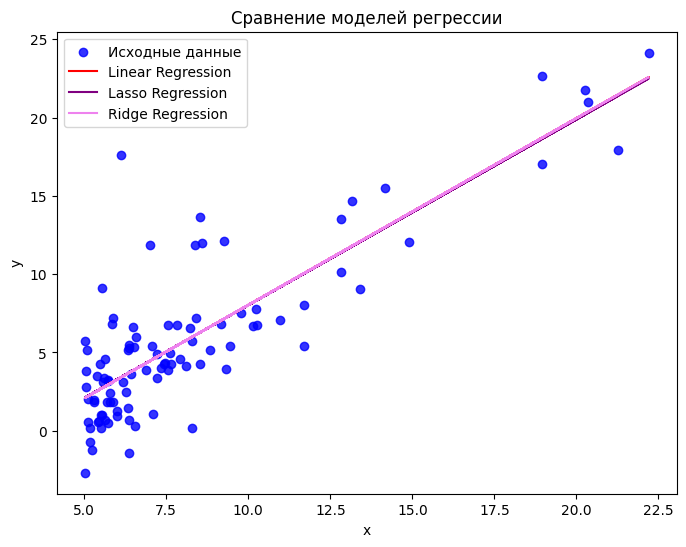

In [13]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

lasso.fit(X, y)
ridge.fit(X, y)

y_pred_lasso = lasso.predict(X)
y_pred_ridge = ridge.predict(X)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="Исходные данные", alpha=0.8)
plt.plot(x, y_pred, color="red", label="Linear Regression")
plt.plot(x, y_pred_lasso, color="purple", label="Lasso Regression")
plt.plot(x, y_pred_ridge, color="violet", label="Ridge Regression")
plt.title("Сравнение моделей регрессии")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [7]:
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\nMSE: {mse:.4f}, R2: {r2:.4f}\n")

print_metrics(y, y_pred, "Linear Regression")
print_metrics(y, y_pred_lasso, "Lasso Regression")
print_metrics(y, y_pred_ridge, "Ridge Regression")


Linear Regression:
MSE: 8.9539, R2: 0.7020

Lasso Regression:
MSE: 8.9546, R2: 0.7020

Ridge Regression:
MSE: 8.9539, R2: 0.7020



In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abrambeyer/openintro-possum", path='possum.csv')

print("Path to dataset files:", path)

100%|██████████| 5.36k/5.36k [00:00<00:00, 9.07MB/s]

Path to dataset files: /root/.cache/kagglehub/datasets/abrambeyer/openintro-possum/versions/1/possum.csv


In [9]:
df = pd.read_csv(path)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [10]:
df = df.dropna().reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      101 non-null    int64  
 1   Pop       101 non-null    object 
 2   sex       101 non-null    object 
 3   age       101 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    101 non-null    float64
 6   totlngth  101 non-null    float64
 7   taill     101 non-null    float64
 8   footlgth  101 non-null    float64
 9   earconch  101 non-null    float64
 10  eye       101 non-null    float64
 11  chest     101 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.4+ KB


In [11]:
df = df.drop('case', axis=1)

df_num = df.drop(['Pop', 'sex', 'taill'], axis=1)
df_cat = df[['Pop', 'sex']]
target = df[['taill']]
df_num.head()

,site,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly
0,1,8.0,94.1,60.4,89.0,74.5,54.5,15.2,28.0,36.0
1,1,6.0,92.5,57.6,91.5,72.5,51.2,16.0,28.5,33.0
2,1,6.0,94.0,60.0,95.5,75.4,51.9,15.5,30.0,34.0
3,1,6.0,93.2,57.1,92.0,76.1,52.2,15.2,28.0,34.0
4,1,2.0,91.5,56.3,85.5,71.0,53.2,15.1,28.5,33.0


In [31]:
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)

X = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
y = target
X.head()

,site,age,hdlngth,skullw,totlngth,footlgth,earconch,eye,chest,belly,Pop_other,sex_m
0,-1.135075,2.192511,0.391091,1.114121,0.414441,1.389467,1.575748,0.141928,0.465334,1.238441,False,True
1,-1.135075,1.143015,-0.065889,0.207174,1.013103,0.934052,0.758956,0.901381,0.714004,0.133146,False,False
2,-1.135075,1.143015,0.362530,0.984557,1.970964,1.594404,0.932215,0.426723,1.460016,0.501578,False,False
3,-1.135075,1.143015,0.134040,0.045219,1.132836,1.753799,1.006469,0.141928,0.465334,0.501578,False,False
4,-1.135075,-0.955976,-0.351501,-0.213909,-0.423687,0.592490,1.253981,0.046996,0.714004,0.133146,False,False


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")


Размеры выборок:
Обучающая выборка: (80, 12), Тестовая выборка: (21, 12)


In [38]:
# Линейная регрессия
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [44]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [46]:
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\nMSE: {mse:.4f}, R2: {r2:.4f}\n")

print_metrics(y_test, y_pred, "Linear Regression")
print_metrics(y_test, y_pred_lasso, "Lasso Regression")
print_metrics(y_test, y_pred_ridge, "Ridge Regression")

Linear Regression:
MSE: 1.2407, R2: 0.4969

Lasso Regression:
MSE: 1.3480, R2: 0.4534

Ridge Regression:
MSE: 1.2408, R2: 0.4968

